/home/whaleshark/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128684 (\N{SMOKING SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/whaleshark/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129313 (\N{CLOWN FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


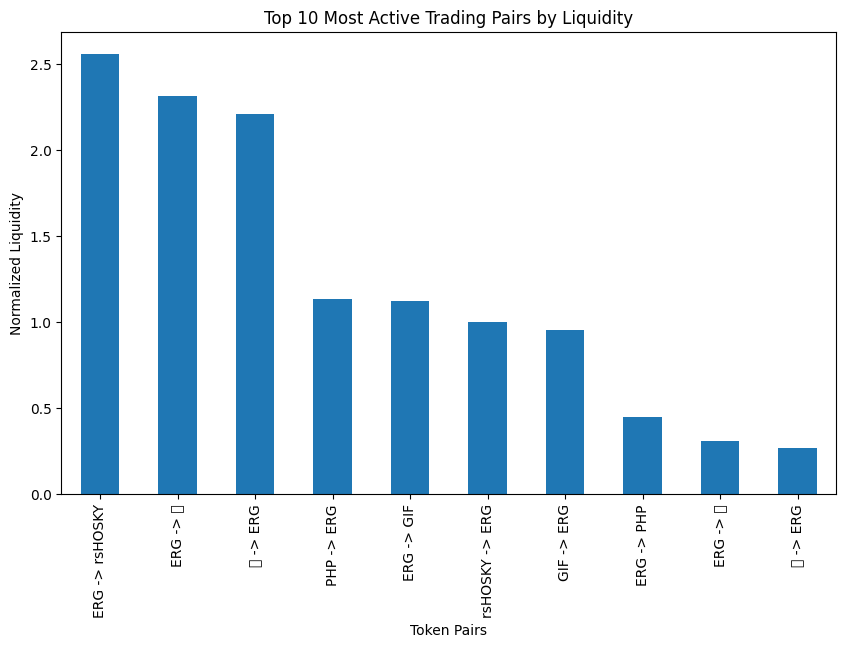

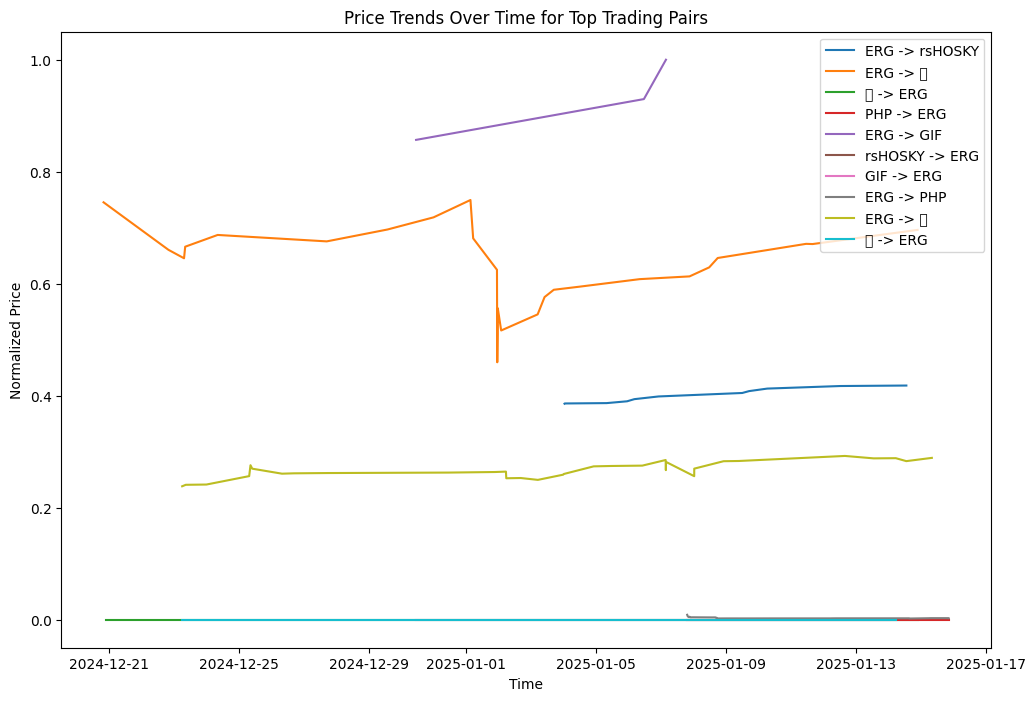

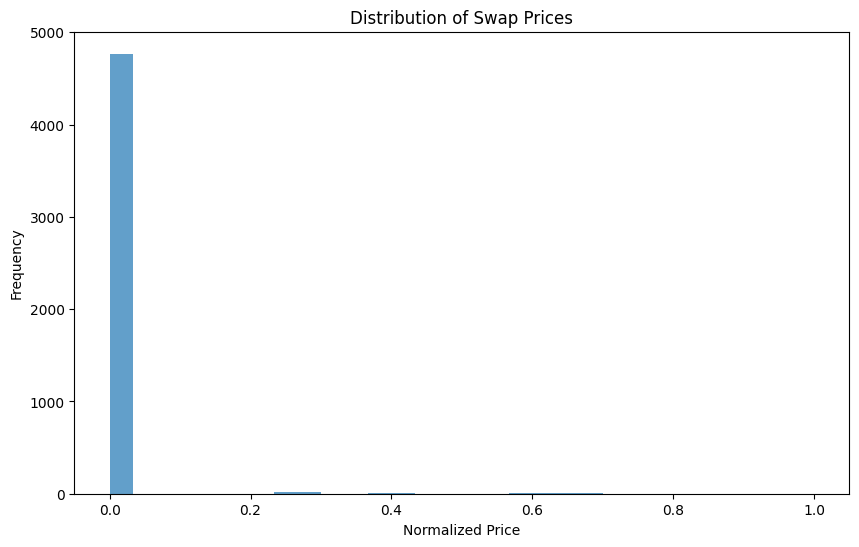

/home/whaleshark/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128684 (\N{SMOKING SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/whaleshark/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129313 (\N{CLOWN FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


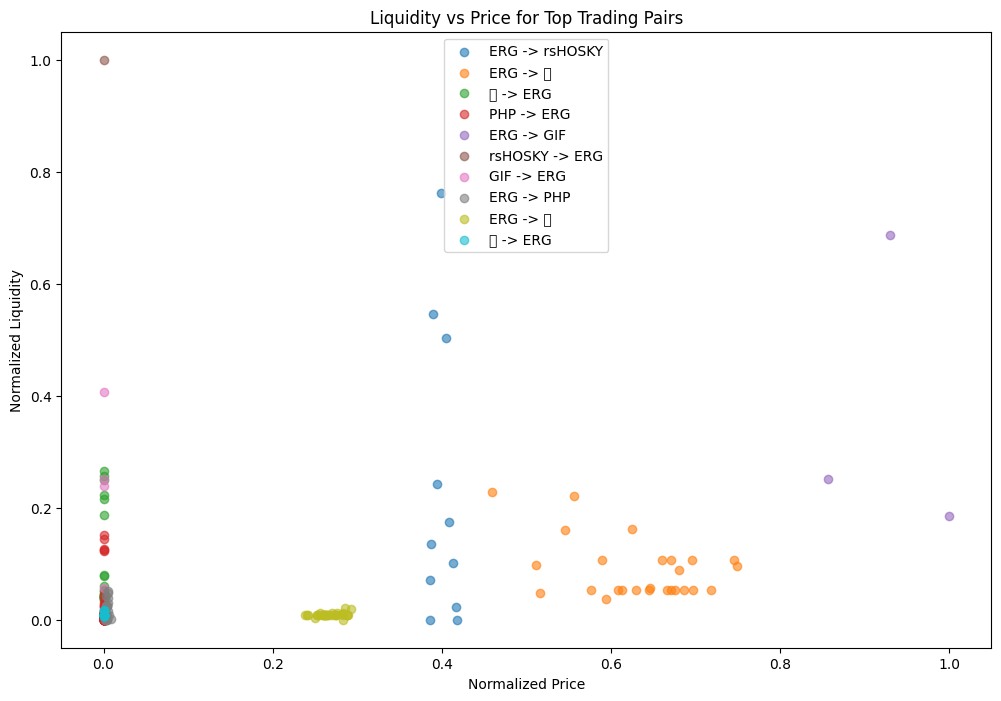

/home/whaleshark/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128684 (\N{SMOKING SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/whaleshark/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129313 (\N{CLOWN FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


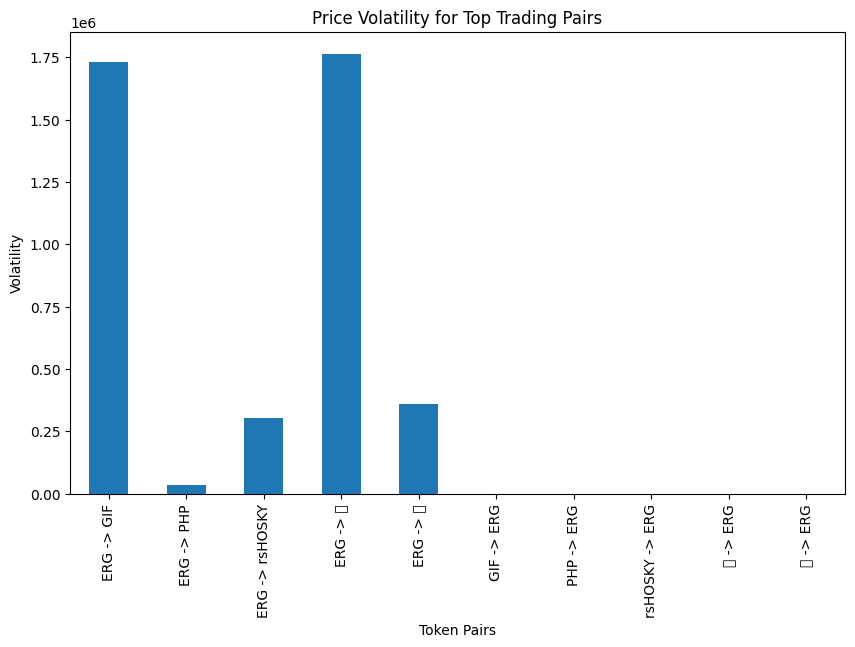

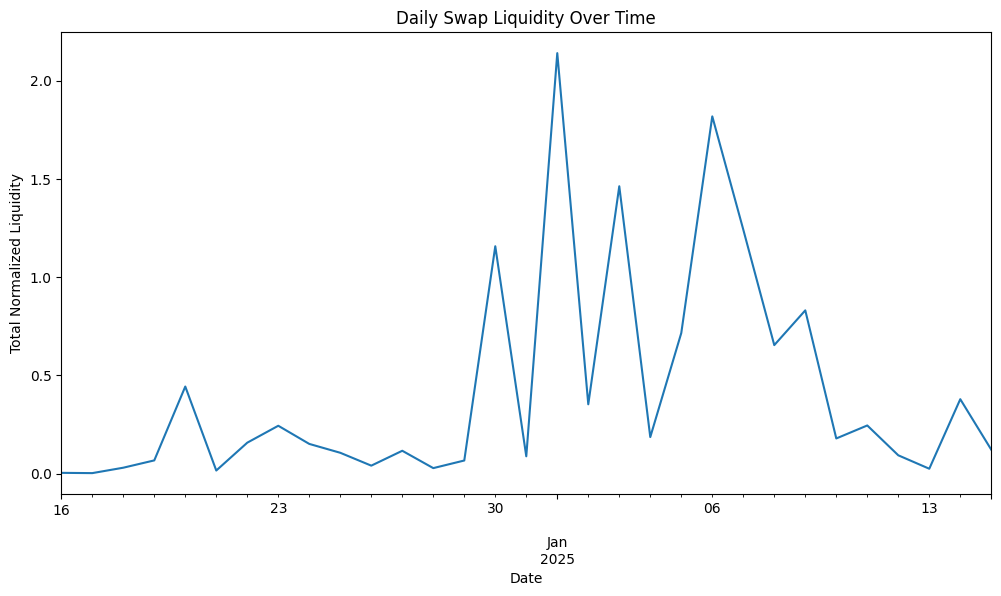

/home/whaleshark/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128684 (\N{SMOKING SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/whaleshark/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129313 (\N{CLOWN FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


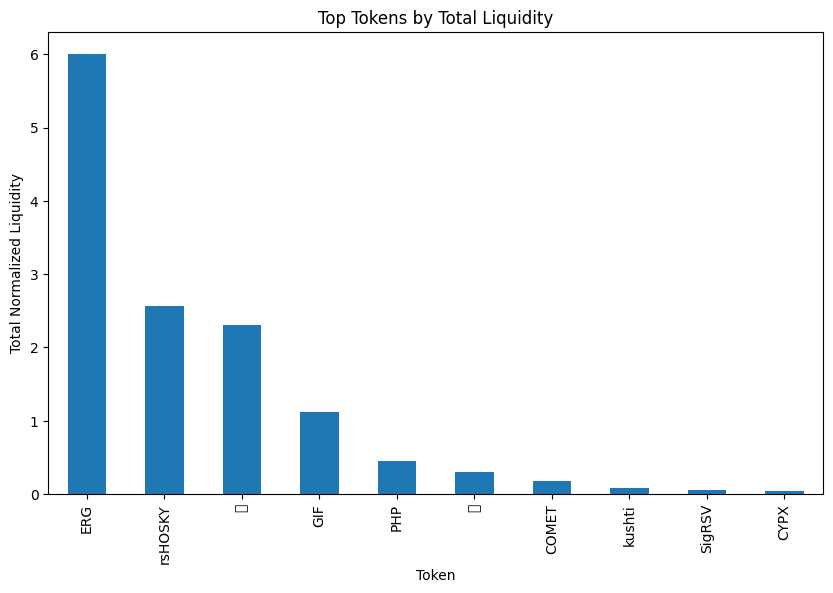

In [17]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt

# Define the path to the JSON file
data_folder = "data"
json_file = os.path.join(data_folder, "swaps_20250115_162039.json")

# Load the JSON data
with open(json_file, 'r') as f:
    raw_data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(raw_data["swaps"])

# Convert timestamp to datetime for better visualization
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Create a "pair" column for input-output token pairs
df['pair'] = df['input_token_name'] + " -> " + df['output_token_name']

# Add liquidity as a feature (input + output amounts adjusted)
df['liquidity'] = df['input_amount_adjusted'] + df['output_amount_adjusted']

# Calculate price volatility for each pair
pair_volatility = df.groupby('pair')['price'].std().reset_index()
pair_volatility.columns = ['pair', 'price_volatility']
df = df.merge(pair_volatility, on='pair', how='left')

# Normalize price, liquidity, and other numerical columns for consistency
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['input_amount_adjusted', 'output_amount_adjusted', 'price', 'liquidity']] = scaler.fit_transform(
    df[['input_amount_adjusted', 'output_amount_adjusted', 'price', 'liquidity']]
)

# Save a cleaned version of the dataset for future use
cleaned_data_file = os.path.join(data_folder, "cleaned_swap_data.csv")
df.to_csv(cleaned_data_file, index=False)

# Visualization: Most active pairs by liquidity
most_active_pairs = df.groupby('pair')['liquidity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
most_active_pairs.plot(kind='bar', title="Top 10 Most Active Trading Pairs by Liquidity")
plt.xlabel("Token Pairs")
plt.ylabel("Normalized Liquidity")
plt.show()

# Visualization: Price trends over time for top pairs
top_pairs = most_active_pairs.index.tolist()
filtered_df = df[df['pair'].isin(top_pairs)]

plt.figure(figsize=(12, 8))
for pair in top_pairs:
    pair_data = filtered_df[filtered_df['pair'] == pair]
    plt.plot(pair_data['timestamp'], pair_data['price'], label=pair)

plt.title("Price Trends Over Time for Top Trading Pairs")
plt.xlabel("Time")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()

# Display the cleaned data to the user
# Visualization: Distribution of Swap Prices
plt.figure(figsize=(10, 6))
df['price'].plot(kind='hist', bins=30, alpha=0.7, title="Distribution of Swap Prices")
plt.xlabel("Normalized Price")
plt.ylabel("Frequency")
plt.show()

# Visualization: Liquidity vs Price for Top Pairs
plt.figure(figsize=(12, 8))
for pair in top_pairs:
    pair_data = filtered_df[filtered_df['pair'] == pair]
    plt.scatter(pair_data['price'], pair_data['liquidity'], label=pair, alpha=0.6)

plt.title("Liquidity vs Price for Top Trading Pairs")
plt.xlabel("Normalized Price")
plt.ylabel("Normalized Liquidity")
plt.legend()
plt.show()

# Visualization: Price Volatility for Top Pairs
volatility_top_pairs = pair_volatility[pair_volatility['pair'].isin(top_pairs)]
plt.figure(figsize=(10, 6))
volatility_top_pairs.set_index('pair')['price_volatility'].plot(kind='bar', title="Price Volatility for Top Trading Pairs")
plt.xlabel("Token Pairs")
plt.ylabel("Volatility")
plt.show()

# Visualization: Swap Volumes Over Time
plt.figure(figsize=(12, 6))
df.resample('D', on='timestamp')['liquidity'].sum().plot(title="Daily Swap Liquidity Over Time")
plt.xlabel("Date")
plt.ylabel("Total Normalized Liquidity")
plt.show()

# Visualization: Top Tokens by Total Liquidity
top_tokens = df.groupby('output_token_name')['liquidity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_tokens.plot(kind='bar', title="Top Tokens by Total Liquidity")
plt.xlabel("Token")
plt.ylabel("Total Normalized Liquidity")
plt.show()


In [18]:
df

,tx_id,timestamp,height,input_token,input_token_name,input_token_decimals,output_token,output_token_name,output_token_decimals,input_amount,output_amount,input_amount_adjusted,output_amount_adjusted,price,fee_erg,is_lp_action,pair,liquidity,price_volatility
0,98079c865e1335ffee030e0d3e09bbe0403e77be7c709b...,2024-12-16 15:37:41.607,1418520,01dce8a5632d19799950ff90bca3b5d0ca3ebfa8aaafd0...,CYPX,4,ERG,ERG,9,2206193470,374537983085,5.560204e-04,1.240166e-06,7.024604e-11,0.0,False,CYPX -> ERG,0.000557,0.000242
1,a809fcdb33109cbfcc18bae0b74e11831d4aeb2812c6b0...,2024-12-16 15:39:54.675,1418522,ERG,ERG,9,01dce8a5632d19799950ff90bca3b5d0ca3ebfa8aaafd0...,CYPX,4,52439070103,303698125,1.321605e-07,1.005602e-04,2.396449e-05,0.0,False,ERG -> CYPX,0.000077,117.191308
2,7526c75969ff09a6dc9fa98da4d62439d64fc926d427e9...,2024-12-16 15:42:25.242,1418523,01dce8a5632d19799950ff90bca3b5d0ca3ebfa8aaafd0...,CYPX,4,ERG,ERG,9,2349060617,398468021333,5.920268e-04,1.319403e-06,7.018896e-11,0.0,False,CYPX -> ERG,0.000593,0.000242
3,9ba9ec12c7e7003d3afb0d2310f679df14d755e3d56934...,2024-12-16 15:42:25.242,1418523,ERG,ERG,9,01dce8a5632d19799950ff90bca3b5d0ca3ebfa8aaafd0...,CYPX,4,335769454373,2000000000,8.462296e-07,6.622377e-04,2.464732e-05,0.0,False,ERG -> CYPX,0.000505,117.191308
4,74b9afc66f243fd9ed703a22c3586f3bdc6404fc1bd755...,2024-12-16 15:46:22.024,1418528,ERG,ERG,9,01dce8a5632d19799950ff90bca3b5d0ca3ebfa8aaafd0...,CYPX,4,51193615720,303472653,1.290216e-07,1.004855e-04,2.452928e-05,0.0,False,ERG -> CYPX,0.000077,117.191308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4836,8a918257ad952095162b4c30879df792392a84e51c9b78...,2025-01-15 19:38:04.243,1440049,34d449dc84a27d0f8fb2166d415a7223604f6426fb2d83...,PHP,8,ERG,ERG,9,199999999999661,30683353936,5.040541e-03,1.015984e-07,6.329777e-13,0.0,False,PHP -> ERG,0.005041,0.000004
4837,0a868c98b7b3e61002d4aa42573700cf1d889df44c35c9...,2025-01-15 20:53:04.453,1440078,ERG,ERG,9,34d449dc84a27d0f8fb2166d415a7223604f6426fb2d83...,PHP,8,9989768937,67515469659529,2.517673e-08,2.235565e-03,2.796590e-03,0.0,False,ERG -> PHP,0.001702,35543.083043
4838,e365f0700433e86132d3fb615eda120c93dedf53b55dc5...,2025-01-15 20:53:04.453,1440078,ERG,ERG,9,34d449dc84a27d0f8fb2166d415a7223604f6426fb2d83...,PHP,8,3293380143,22212469788030,8.300025e-09,7.354968e-04,2.790847e-03,0.0,False,ERG -> PHP,0.000560,35543.083043
4839,18cbb1ea18d1174d02176cd59d5b6f2c48095a6848c246...,2025-01-15 20:58:27.202,1440080,ERG,ERG,9,089990451bb430f05a85f4ef3bcb6ebf852b3d6ee68d86...,QUACKS,6,350656941921,25000000000,8.837501e-07,8.277971e-05,2.950112e-06,0.0,False,ERG -> QUACKS,0.000064,7.337202


In [12]:
pairs = list(df.pair.unique())
for item in pairs:
    if 'RSV' in item:
        print(item)

ERG -> SigRSV
SigRSV -> ERG
ERG -> ERG_SigRSV_LP
ERG_SigRSV_LP -> ERG
